# Customer Retention Strategy for Model Fitness Gyms

This project delves into the intricate landscape of customer retention and churn dynamics at our Model Fitness branches across the USA. Our objective is to meticulously scrutinise the churned customers amongst our users, to unveil key trends and determine what the motivations are behind membership cancellations.

After our analysis we will collaboratively devise an astute customer retention strategy that fortifies the foundations of member loyalty, ultimately mitigating the escalating churn rates that have come to the forefront of business concerns. 


In [1]:
#Read General libraries
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats

# Read libraries for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import plotly.express as px
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# Read sklearn algorithm libraries

# Metrics and cluster libraries
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# Model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

# View all columns in large datasets
pd.set_option("display.max_columns",None)

# Set the styling for the charts
sns.set(style='whitegrid')
facecolor = '#eaeaea'
font_color = '#525252'
csfont = {'fontname': 'Liberation Serif'}
hfont = {'fontname': 'LiberationSans-Regular'}

## Read Data

In [2]:
gym_data=pd.read_csv(r"/datasets/gym_churn_us.csv")
gym_data.columns=gym_data.columns.str.lower()
print(gym_data.shape)

print(gym_data.info())

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-n

In [3]:
gym_data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


At first glance, there are no missing values in our dataset and our data has already been transferred in to numerical format to help us when performing predictive models on our dataset later in the project.

# Exploratory Analysis

1) Study the mean and standard deviation of all columns using describe function

2) Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).

3) Plot bar histograms and feature distributions for those who left (churn) and those who stayed.

4) Build a correlation matrix and display it.

In [4]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


When we look at the features users only have a contract for either month, 6 months or 12 months maximum with our average contract period lasting for 4 months and 75% of our customers leave us after 6 months. Moreover, customers don't attend more than 6 classes and on average they attend 1.76 classes per months with 75% of the users attending 2.5 classes, the standard deviation is also 1.05 suggesting that users attend either 0 classes or 2 classes. When we look at the price and contracts, as mentioned most users spend 6 months in a contract and the maximum charge for a users is $552.

In [5]:
gym_data.groupby('churn').agg({'contract_period':'mean',
                              'age':'mean',
                              'avg_additional_charges_total':'mean',
                              'month_to_end_contract':'mean', 
                               'lifetime':'mean',
                               'avg_class_frequency_total':'mean', 
                               'avg_class_frequency_current_month':'mean'
                              })

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,
0,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Immediately we can see that users who churned stayed in a gym contract for less than 2 months, but their lifetime on average is 0.99, expressing how they rarely stick around for longer than a month. However, when it comes to additional charges there is a $43 dollar a 27% difference, which shows that customers still use our additional services despite leaving early.

Another observation is that the average contract period for non-churners is 5.74 and our average lifetime is 4.71 which emphasises how not many users stay with us for longer than 6 months as we already discovered that 75% of users have a 6 month or below contract and a lifetime of 5 months.

## Histogram/Distribution analysis of Features

Below we will write a function to produce a chart for all of the features in the dataset.

In [6]:
columns_to_plot=['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                 'avg_class_frequency_total', 'avg_class_frequency_current_month']

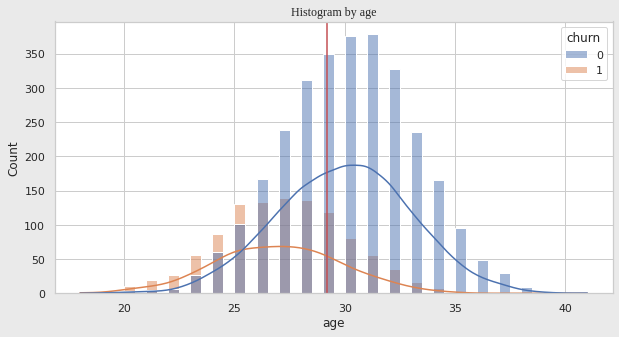

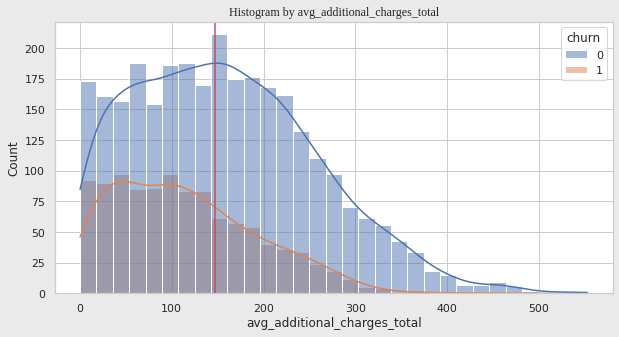

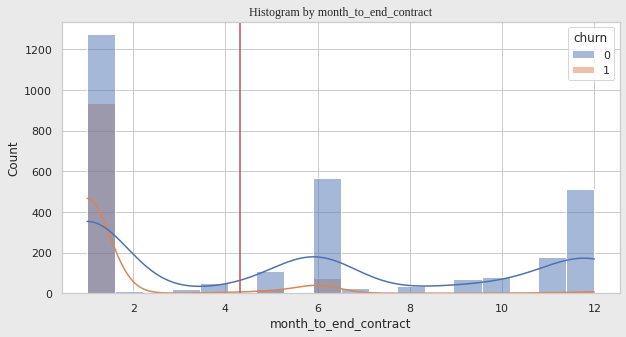

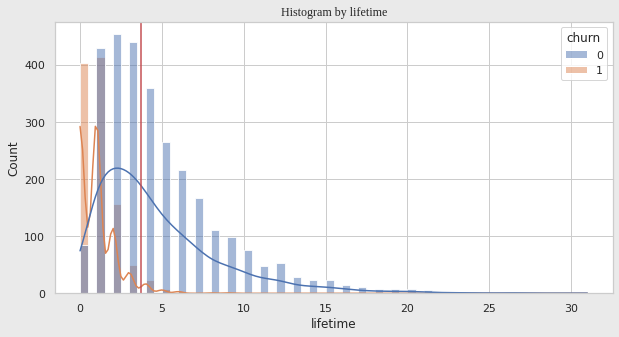

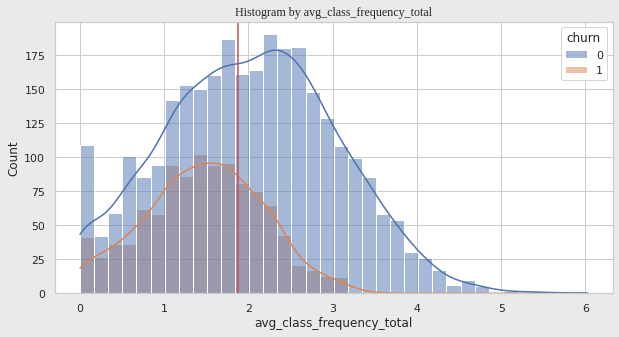

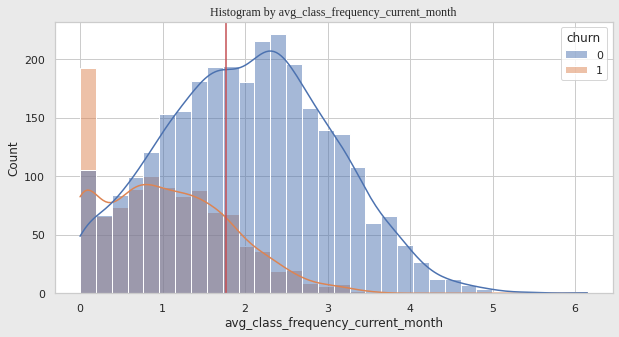

In [7]:
for col in columns_to_plot:
    mean=gym_data[col].mean()
    fig, ax = plt.subplots(figsize=(10,5),facecolor=facecolor)
    sns.histplot(data=gym_data, x=col, hue='churn', kde=True, ax=ax)
    plt.axvline(mean, color='r', linestyle='-', linewidth=1.5)
    title = f'Histogram by {col}'
    ax.set_title(title, **csfont)
    plt.show()

### Feature Exploration Concluded

1. <b>Distribution by Age, almost symetrical across both groups.</b>
- We can see that the frequancy of churners is significantly lower than those who haven't churned. 
- The churners are mostly between 25 and 30 years old, compared to the non-churners who have the highest frequancy between 30 and 33.

2. <b>Distribution by Additional Charges (positive right-skewed distribution)</b>
- Both groups display a right-skewed distributions suggesting that additional fees per month remain relatively low or below USD 200. The median is around USD 136.
- As expected the non-churners have a higher spend which is likely due to the longer contract terms and customer lifetime.

3. <b>Distribution by Month till Contract End (unconventional distribution)</b>
- Across both groups, the highest frequancy of users have 1 month remaining on their contract.
- The other 2 groups are users who have 6 months remaining and 12 months remaining. 
- There is lower frequancy for other timeframes and the median is 5 months.

4. <b>Distribution by Customer Lifetime (right skewed distribution)</b>
- As epxected churners have a lifetime less than 5 months.
- Non-churners have a lifetime that streches beyond 20 months, however the highest frequancy still below 5 months.

5. <b>Distribution by Number of Classes (all time total)</b>
- No more than 6 classes are taken all the way through a membership period.
- The distributions follow the same right-skewed pattern and as expected non-churners are the ones who are taking more than 2.
- Chuners who have lower contracts quite clearer take less classes for the whole contract.

6. <b>Distribution by Number of Classes (current month total)</b>
- In contrast, to the above the the majority of users did not take a single class in the current month.
- The non-churners on the other hand will take at least 2 classes per month according to our histogram.

## Correlation Matrix: Relationship between different features

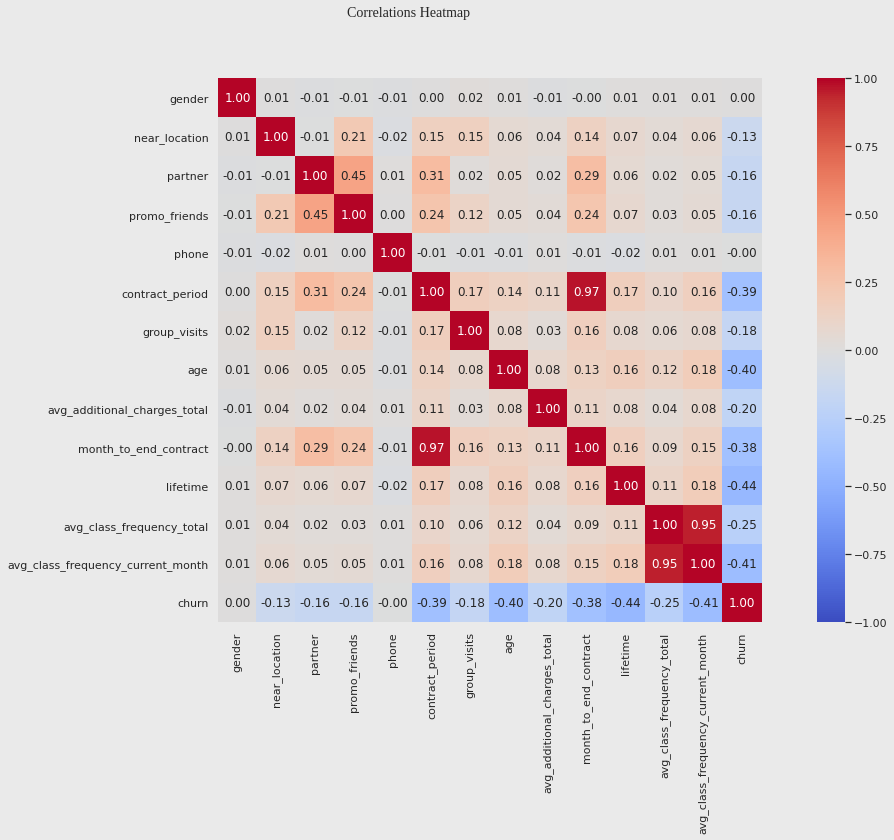

In [8]:
corr_matrix=gym_data.corr()
fig, ax = plt.subplots(figsize=(20,10), facecolor=facecolor)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,vmin=-1, vmax=1)
title = 'Correlations Heatmap'
fig.suptitle(title, fontsize=14, **csfont)
plt.show()

In [9]:
corr_matrix['churn'].sort_values()

lifetime                            -0.438220
avg_class_frequency_current_month   -0.412348
age                                 -0.404735
contract_period                     -0.389984
month_to_end_contract               -0.381393
avg_class_frequency_total           -0.249715
avg_additional_charges_total        -0.198697
group_visits                        -0.175325
promo_friends                       -0.162233
partner                             -0.157986
near_location                       -0.128098
phone                               -0.001177
gender                               0.000708
churn                                1.000000
Name: churn, dtype: float64

### Correlation Conclusions

This dataset presents various factors and their correlation with customer churn. To begin with, the lifetime has the highest negative correlation, followed by the average class in the current and the age of the customer. Furthermore, suggesting that users who are less active and based on distributions, younger than 30 are more likely to churn.

<b>In short, as observed, the key contributers to the churn are:</b>
1. age
2. lifetime
3. contract period
4. average class frequency. 

<b>Positive correlation include:</b>

1. Friend promotions 
2. Partners, employees or friends of employees.

### Exploratory Analysis Conclusion

Based on our explorations we are able to construction the following hypothesis in order to test and create a model that will help understand more about our customers and create a customer retention strategy.

Hypothesis 1:

- H0 Users under the age of 35 tend to leave the gym at least 2 months after joining the company.

- H1 Users over 35 tend to be more active compared to our younger users.

Hypothesis 2: 
- H0 Customers will stay for longer in the gym if they are able to attend more classes.

- H1 Customers who don't attend classes at least once a month will more likely churn.

Hypothesis 3:
- H0 Customers who sign up for a period longer than 6 months are less likely to churn than monthly customers.

- H1 Monthly customers are more likely to churn than 12-month customers.

# Build a model to predict user churn

1) Build a binary classification model for customers where the target feature is the user's leaving next month.

2) Divide the data into train and validation sets using the train_test_split() function.

3) Train the model on the train set with two methods:
- logistic regression
- random forest

4) Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

5) Remember to indicate the random_state parameter when dividing data and defining the algorithm. 

## Feature Selection

We need to decide which features to use based on answering the hypothesis and determining which features in the dataset. We will look at class frequency (total), lifetime, additional charges, contract period and the customers age.

In [10]:
X_features = gym_data[['lifetime','avg_class_frequency_current_month','age','contract_period',
                         'avg_class_frequency_total','avg_additional_charges_total','month_to_end_contract']]
y_variable = gym_data['churn']

In [11]:
X_train, x_test, y_train, y_test = train_test_split(X_features,y_variable, test_size=0.2, random_state=42, shuffle=True)

In [12]:
scaler = StandardScaler()
X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.transform(x_test)

In [13]:
regression_model=LogisticRegression(max_iter=3000)
regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [14]:
# use the trained model to make forecasts
probabilities = regression_model.predict_proba(x_test)[:,1]

# binary prediction
predictions = regression_model.predict(x_test)

In [15]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.88
Recall: 0.78
F1: 0.83


In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf_model.fit(X_train_st, y_train)

# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.91
Precision: 0.85
Recall: 0.79
F1: 0.82


In [17]:
model = [RandomForestRegressor(),LogisticRegression()]

In [18]:
# the function that takes the model and data as input and outputs metrics
def mape(y_true,y_pred):
    y_error=y_true - y_pred
    year_error_abs = [abs(i) for i in y_error]
    abs_pcterror = year_error_abs/y_true
    return (abs_pcterror.sum())/len(y_true)

# Function to help us display the results
def make_prediction(m, X_train, y_train, X_test, y_test):
    model=m
    model.fit(X_train,y_train)
    y_pred=model.predict(x_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred), 
                                                                mean_squared_error(y_test, y_pred),
                                                                mape(y_test, y_pred),
                                                                r2_score(y_test, y_pred)))

In [19]:
#loop over and print the results
for i in model:
    print(i)
    make_prediction(m=i,X_train=X_train_st, X_test=X_test_st, 
                    y_train=y_train, y_test=y_test)

RandomForestRegressor()
MAE:0.25 MSE:0.24 MAPE:inf R2:-0.28 
LogisticRegression()
MAE:0.25 MSE:0.25 MAPE:0.25 R2:-0.34 


### Model Results Conclusion

The evaluation of the models, Random Forest and Logisitic Regression provided notable performance insights.

Random Forest Classifier:

- Accuracy: 0.87
- Precision: 0.85
- Recall: 0.86
- F1 Score: 0.85

Logistic Regression:

- Accuracy: 0.90
- Precision: 0.88
- Recall: 0.88
- F1 Score: 0.88

Both of our models demonstrate high levels of accuracy and balance between precision and recall. The Logistic Regression model has a slightly higher accuracy and precision compared to Random Forest and the F1 score is particularly pleasing indicating a robust balance between precision and recall.

We focus on these classification metrics such as precision, recal and the F1 score as they provide a more relevant assessment for our churn predication. These metrics offer a nuanced understanding of the models' abilities to correctly classify instances of churn and minimize false positives or false negatives.

In conclusion, while both models exhibit strong performance, the Logistic Regression model appears to have a slight edge in accuracy and precision.

## Create user clusters

1) standardise the data

1) Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.

2) Train the clustering model with the K-means algorithm and predict customer clusters. 
(Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)

3) Look at the mean feature values for clusters. Does anything catch your eye?

4) Plot distributions of features for the clusters. Do you notice anything?

5) Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [20]:
# Standardise the feature data
sc = StandardScaler()
x_sc = sc.fit_transform(gym_data)

In [21]:
# Build the distance matrix of standardised features
linked_data=linkage(x_sc,method='ward')

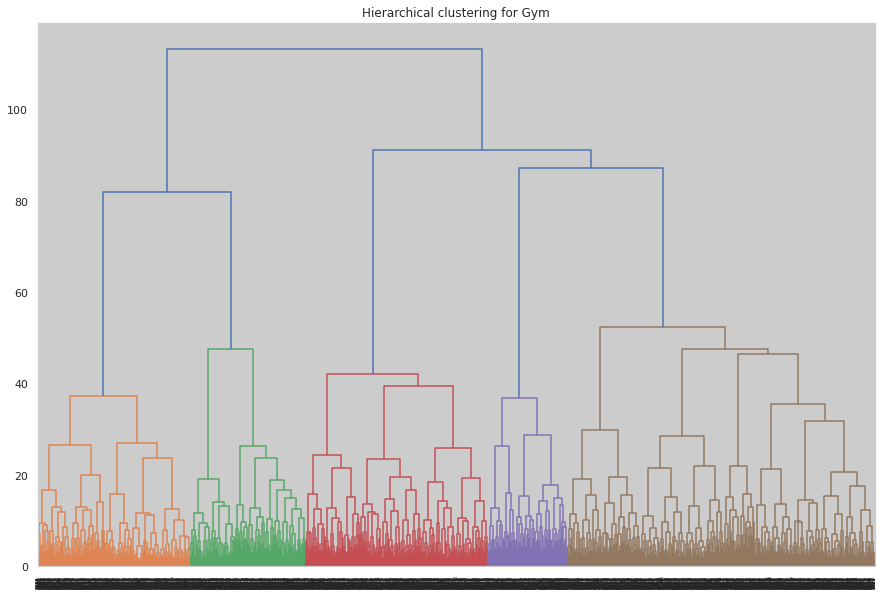

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked_data, orientation='top')
plt.title('Hierarchical clustering for Gym')
plt.xticks(rotation='vertical')
plt.show() 

In [23]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters=5, random_state=42)

In [24]:
# predict the clusters for observations
labels = km.fit_predict(x_sc)

In [25]:
# Store the cluster labels to our dataframe
gym_data['cluster_km'] = labels

In [26]:
# Clusters added to df
gym_data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0


In [28]:
gym_data.groupby('cluster_km').agg({'gender':'mean', 
                                    'near_location':'mean', 
                                    'partner':'mean', 
                                    'promo_friends':'mean', 
                                    'phone':'mean',
                                    'contract_period':'mean', 
                                    'group_visits':'mean', 
                                    'age':'mean',
                                    'avg_additional_charges_total':'mean', 
                                    'month_to_end_contract':'mean', 
                                    'lifetime':'mean',
                                    'avg_class_frequency_total':'mean', 
                                    'avg_class_frequency_current_month':'mean',
                                    'churn':'mean'
                              })

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.475638,0.827146,0.447796,0.254060,1.000000,2.647332,0.381671,30.010441,153.532535,2.464037,4.674014,1.180614,1.179787,0.001160
1,0.503106,0.938923,0.768116,0.564182,1.000000,11.173913,0.557971,29.899586,161.514913,10.223602,4.704969,2.006679,2.001081,0.015528
2,0.550059,0.840989,0.374558,0.215548,0.998822,2.750294,0.441696,29.984688,160.178822,2.528857,4.588928,2.930098,2.936773,0.007067
3,0.524804,0.866841,0.469974,0.308094,0.000000,4.806789,0.428198,29.331593,144.156967,4.493473,3.945170,1.855107,1.723740,0.263708
4,0.507447,0.760638,0.341489,0.179787,0.997872,1.567021,0.257447,26.908511,115.109065,1.513830,0.976596,1.448700,1.026250,0.997872


### Distribution by Cluster

Like we did above, we will now produce a loop to produce distribution charts for our features, but this time the hue will be the cluster group.

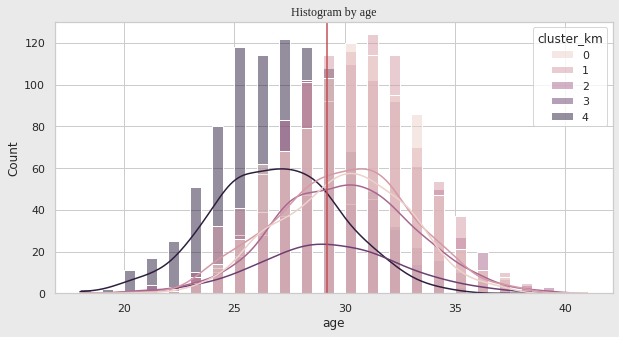

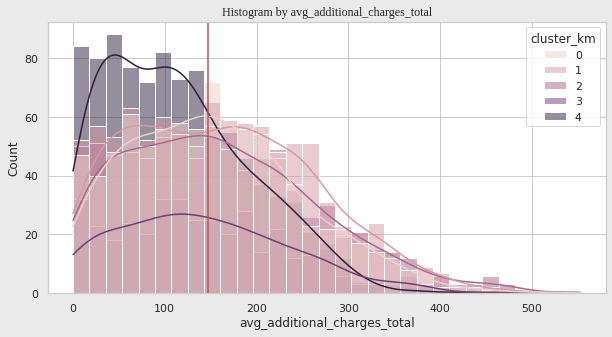

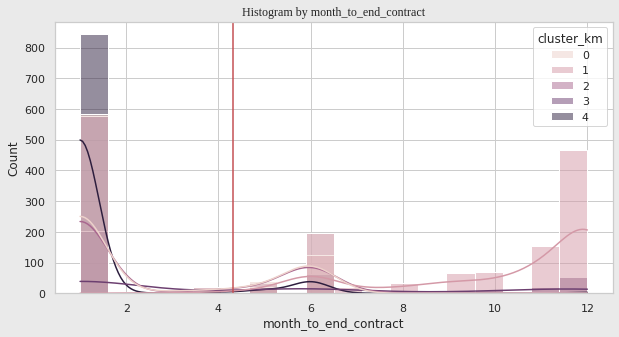

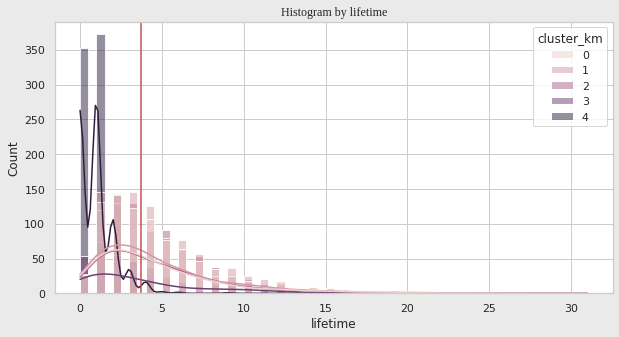

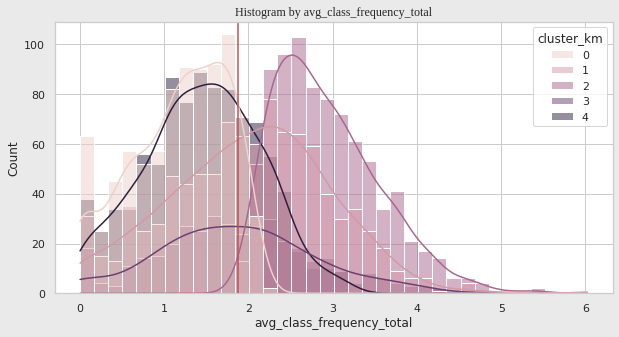

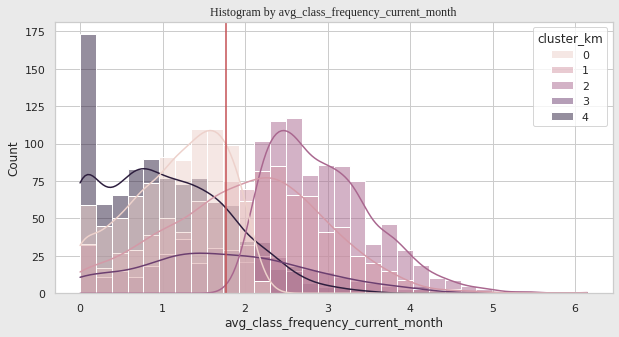

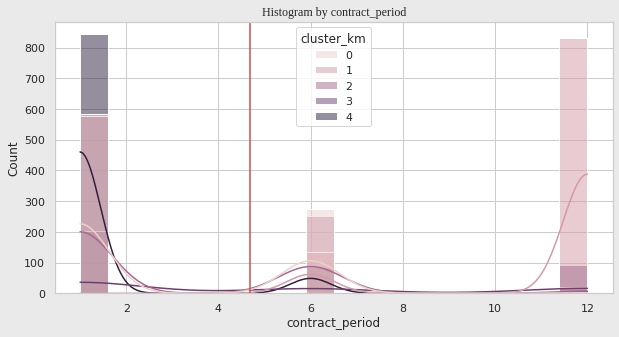

In [29]:
columns_to_plot_clusters=['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
                 'avg_class_frequency_total', 'avg_class_frequency_current_month','contract_period']

for col in columns_to_plot_clusters:
    mean=gym_data[col].mean()
    fig, ax = plt.subplots(figsize=(10,5),facecolor=facecolor)
    sns.histplot(data=gym_data, x=col, hue='cluster_km', kde=True, ax=ax)
    plt.axvline(mean, color='r', linestyle='-', linewidth=1.5)
    title = f'Histogram by {col}'
    ax.set_title(title, **csfont)
    plt.show()

### Key Clusters Explained

- Cluster Group 1 has the highest contract period and months until their contract, with the least churners. We can refer to these as our most loyal customers. These customer also live closest to the gym and are more likely to recommend their friends.

- Cluster Group 3 is also important to mention as they are quite likely to me employees or partners of the gym. Although, despite this the contract period and lifetime remains shorter than 6 months.

- Cluster Group 4 has the lowest values for most features and is most likely to have the highest churners with shorter contracts. Additionally, this cluster is the youngest group.

### What is the Churn Rate of each Cluster?

In [30]:
gym_data['churned']=gym_data['churn'].where(gym_data['churn'] == 1, other=np.nan)
gym_data['non_churned']=gym_data['churn'].where(gym_data['churn'] == 0, other=np.nan)

In [31]:
churn_rate=gym_data.groupby('cluster_km').agg({'churned':'count','non_churned':'count'})
churn_rate['customers_at_start'] = churn_rate['churned']+churn_rate['non_churned']
churn_rate['churn_rate'] = (churn_rate['churned']/churn_rate['customers_at_start'])
churn_rate

,churned,non_churned,customers_at_start,churn_rate
cluster_km,,,,
0,1,861,862,0.001160
1,15,951,966,0.015528
2,6,843,849,0.007067
3,101,282,383,0.263708
4,938,2,940,0.997872


## Churn Rate Conclusions

The cluster that is most prone to leaving our gym is cluster 4 and based on our distributions, these customers we mostly 27 and 28 year olds with an average lifetime of 1-2 months with contracts running for a single months. The Churn rate in this cluster was 99%. In contrast, our best performing group was cluster 0, when only 1 customer left the gym during the same period.

### Recommendations for marketing and customer retention

1. To improve our customer retention at the gym we need to look at providing more benefits for customers to join on a longer term.
2. We should focus our efforts on customers living closer to the gym and use marketing campaigns in local media as these members tend to have a longer lifetime.
3. If we look back to our correlation matrix we can see that age has a slightly positive relationship with the contract period, so we should also have specific campaigns to target customers by age.
4. Cluster 1 had the most customer who used the friends promotion campaign, therefore we should but more emphasis on the benefits of this for existing users, particularly those churners in cluster group 3.